#### 날짜와 시간 변환

In [1]:
import datetime

format = '%Y-%m-%d %H:%M:%S'
datetime_str = '2022-05-07 19:56:33'
datetime_dt = datetime.datetime.strptime(datetime_str, format)

print(type(datetime_dt))
print(datetime_dt)

<class 'datetime.datetime'>
2022-05-07 19:56:33


In [2]:
datetime_str = datetime_dt.strftime('%Y-%m-%d %H:%M:%S')

print(type(datetime_str))
print(datetime_str)

<class 'str'>
2022-05-07 19:56:33


In [3]:
import numpy as np
np.datetime64('2022-05-07')

numpy.datetime64('2022-05-07')

In [4]:
import numpy as np
np.datetime64(1000, 'ns')
np.datetime64(10000, 'D')
np.datetime64(10000000, 's')


numpy.datetime64('1970-04-26T17:46:40')

In [5]:
np.array(['1992-10-24', '2022-05-07', '2022-07-15'], dtype='datetime64')

array(['1992-10-24', '2022-05-07', '2022-07-15'], dtype='datetime64[D]')

In [6]:
np.arange('2022-02', '2022-03', dtype='datetime64[D]')

array(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
       '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
       '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
       '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
       '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
       '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
       '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
      dtype='datetime64[D]')

In [7]:
import pandas as pd

pd.Timestamp(1234.1234, unit='D')
pd.Timestamp('2022-05-07')
pd.to_datetime('2022-05-07 12')
pd.to_datetime(['2022-01-01', '2022-03-01'])
pd.date_range('2022-01', '2022-02')
pd.Period('2022-01')
pd.date_range('2022-01', '2022-02', freq='B')

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31', '2022-02-01'],
              dtype='datetime64[ns]', freq='B')

In [8]:
import pandas as pd

df = pd.read_csv('./csv/merge.csv')
df.head()

,Date,Gold,REMX,AAPL,TSMC,USD/KRW
0,2020-05-01,1728.6,29.93,72.27,51.10,1224.89
1,2020-05-04,1748.5,29.89,73.29,52.15,1224.14
2,2020-05-05,1751.3,31.01,74.39,51.71,1222.47
3,2020-05-06,1729.2,31.07,75.16,52.13,1228.55
4,2020-05-07,1768.6,31.08,75.93,52.33,1219.61


In [9]:
s1 = pd.Series([1, np.nan, 3, 4, 5])
s2 = pd.Series([1, 2, np.nan, 4, 5])
s3 = pd.Series([1, 2, 3, np.nan, 5])
df = pd.DataFrame({ 'S1':s1,
                    'S2':s2,
                    'S3':s3
                    })
df.head()

,S1,S2,S3
0,1.0,1.0,1.0
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0


In [10]:
df['S1'].isna()

0    False
1     True
2    False
3    False
4    False
Name: S1, dtype: bool

In [11]:
df.isna()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [12]:
df.isna().sum()

S1    1
S2    1
S3    1
dtype: int64

In [13]:
df.isin([np.nan])

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [14]:
df.isnull()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [15]:
df.fillna(0)

,S1,S2,S3
0,1.0,1.0,1.0
1,0.0,2.0,2.0
2,3.0,0.0,3.0
3,4.0,4.0,0.0
4,5.0,5.0,5.0


In [16]:
df.fillna(method='ffill')

,S1,S2,S3
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,3.0,2.0,3.0
3,4.0,4.0,3.0
4,5.0,5.0,5.0


In [17]:
df.fillna(method='bfill')

,S1,S2,S3
0,1.0,1.0,1.0
1,3.0,2.0,2.0
2,3.0,4.0,3.0
3,4.0,4.0,5.0
4,5.0,5.0,5.0


In [18]:
(df.fillna(method='ffill') + df.fillna(method='bfill')) / 2

,S1,S2,S3
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,5.0


In [19]:
df.dropna()
df.dropna(axis='rows')
df.dropna(axis=0)

,S1,S2,S3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [20]:
df.dropna(axis='columns')
df.dropna(axis=1)

""
0
1
2
3
4


In [21]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[0:5]

[0, 1, 2, 3, 4]

In [22]:
import pandas as pd

df = pd.read_csv('./csv/merge.csv', index_col='Date', parse_dates=['Date'])
df['AAPL'].head()

Date
2020-05-01    72.27
2020-05-04    73.29
2020-05-05    74.39
2020-05-06    75.16
2020-05-07    75.93
Name: AAPL, dtype: float64

In [23]:
import pandas as pd

df = pd.read_csv('./csv/merge.csv')
df['AAPL'].head()

print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


In [24]:
import pandas as pd

df = pd.read_csv('./csv/merge.csv', index_col='Date', parse_dates=['Date'])
df['AAPL'].head()

print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [25]:
df.loc['2020-05-05']

Gold       1751.30
REMX         31.01
AAPL         74.39
TSMC         51.71
USD/KRW    1222.47
Name: 2020-05-05 00:00:00, dtype: float64

In [26]:
df.iloc[0]

Gold       1728.60
REMX         29.93
AAPL         72.27
TSMC         51.10
USD/KRW    1224.89
Name: 2020-05-01 00:00:00, dtype: float64

In [27]:
df.loc['2020-05-01':'2020-06-01', ['REMX', 'AAPL']]

,REMX,AAPL
Date,,
2020-05-01,29.93,72.27
2020-05-04,29.89,73.29
2020-05-05,31.01,74.39
2020-05-06,31.07,75.16
2020-05-07,31.08,75.93
2020-05-11,31.96,78.75
2020-05-12,31.14,77.85
2020-05-13,31.11,76.91
2020-05-15,30.99,76.93


In [28]:
df.iloc[50:60, [0,1,2]]

,Gold,REMX,AAPL
Date,,,
2020-07-20,1875.1,40.21,98.36
2020-07-21,1906.4,40.69,97.00
2020-07-22,1934.1,40.41,97.27
2020-07-23,1962.7,40.85,92.85
2020-07-27,2004.9,40.97,94.81
2020-07-28,2013.2,41.30,93.25
2020-07-30,2014.2,40.39,96.19
2020-07-31,2034.4,40.06,106.26
2020-08-03,2035.4,40.93,108.94


In [29]:
df['AAPL_lag1'] = df['AAPL'].shift()
df

,Gold,REMX,AAPL,TSMC,USD/KRW,AAPL_lag1
Date,,,,,,
2020-05-01,1728.6,29.93,72.27,51.10,1224.89,NaN
2020-05-04,1748.5,29.89,73.29,52.15,1224.14,72.27
2020-05-05,1751.3,31.01,74.39,51.71,1222.47,73.29
2020-05-06,1729.2,31.07,75.16,52.13,1228.55,74.39
2020-05-07,1768.6,31.08,75.93,52.33,1219.61,75.16
...,...,...,...,...,...,...
2022-03-25,1959.8,116.80,174.72,106.73,1225.08,174.07
2022-03-28,1944.7,114.81,175.60,106.33,1223.65,174.72
2022-03-29,1918.0,117.54,178.96,109.25,1207.35,175.60


In [31]:
df['pct_change'] = df['AAPL'].pct_change()
df

,Gold,REMX,AAPL,TSMC,USD/KRW,AAPL_lag1,pct_change
Date,,,,,,,
2020-05-01,1728.6,29.93,72.27,51.10,1224.89,NaN,NaN
2020-05-04,1748.5,29.89,73.29,52.15,1224.14,72.27,0.014114
2020-05-05,1751.3,31.01,74.39,51.71,1222.47,73.29,0.015009
2020-05-06,1729.2,31.07,75.16,52.13,1228.55,74.39,0.010351
2020-05-07,1768.6,31.08,75.93,52.33,1219.61,75.16,0.010245
...,...,...,...,...,...,...,...
2022-03-25,1959.8,116.80,174.72,106.73,1225.08,174.07,0.003734
2022-03-28,1944.7,114.81,175.60,106.33,1223.65,174.72,0.005037
2022-03-29,1918.0,117.54,178.96,109.25,1207.35,175.60,0.019134


In [32]:
df['AAPL_diff'] = df['AAPL'].diff()
df

,Gold,REMX,AAPL,TSMC,USD/KRW,AAPL_lag1,pct_change,AAPL_diff
Date,,,,,,,,
2020-05-01,1728.6,29.93,72.27,51.10,1224.89,NaN,NaN,NaN
2020-05-04,1748.5,29.89,73.29,52.15,1224.14,72.27,0.014114,1.02
2020-05-05,1751.3,31.01,74.39,51.71,1222.47,73.29,0.015009,1.10
2020-05-06,1729.2,31.07,75.16,52.13,1228.55,74.39,0.010351,0.77
2020-05-07,1768.6,31.08,75.93,52.33,1219.61,75.16,0.010245,0.77
...,...,...,...,...,...,...,...,...
2022-03-25,1959.8,116.80,174.72,106.73,1225.08,174.07,0.003734,0.65
2022-03-28,1944.7,114.81,175.60,106.33,1223.65,174.72,0.005037,0.88
2022-03-29,1918.0,117.54,178.96,109.25,1207.35,175.60,0.019134,3.36


In [33]:
df['MA'] = df['AAPL'].rolling(window=5).mean()
df

,Gold,REMX,AAPL,TSMC,USD/KRW,AAPL_lag1,pct_change,AAPL_diff,MA
Date,,,,,,,,,
2020-05-01,1728.6,29.93,72.27,51.10,1224.89,NaN,NaN,NaN,NaN
2020-05-04,1748.5,29.89,73.29,52.15,1224.14,72.27,0.014114,1.02,NaN
2020-05-05,1751.3,31.01,74.39,51.71,1222.47,73.29,0.015009,1.10,NaN
2020-05-06,1729.2,31.07,75.16,52.13,1228.55,74.39,0.010351,0.77,NaN
2020-05-07,1768.6,31.08,75.93,52.33,1219.61,75.16,0.010245,0.77,74.208
...,...,...,...,...,...,...,...,...,...
2022-03-25,1959.8,116.80,174.72,106.73,1225.08,174.07,0.003734,0.65,170.640
2022-03-28,1944.7,114.81,175.60,106.33,1223.65,174.72,0.005037,0.88,172.684
2022-03-29,1918.0,117.54,178.96,109.25,1207.35,175.60,0.019134,3.36,174.712


In [34]:
type(df['AAPL'].rolling(window=5))

pandas.core.window.rolling.Rolling

In [35]:
import pandas as pd

index = pd.date_range(start= '2022-01-01', end= '2022-05-01', freq='B')
series = pd.Series(range(len(index)), index=index)
series

2022-01-03     0
2022-01-04     1
2022-01-05     2
2022-01-06     3
2022-01-07     4
              ..
2022-04-25    80
2022-04-26    81
2022-04-27    82
2022-04-28    83
2022-04-29    84
Freq: B, Length: 85, dtype: int64

In [37]:
series.resample(rule= 'M').sum()

2022-01-31     210
2022-02-28     610
2022-03-31    1196
2022-04-30    1554
Freq: M, dtype: int64

In [38]:
series.resample(rule= 'M').last()

2022-01-31    20
2022-02-28    40
2022-03-31    63
2022-04-30    84
Freq: M, dtype: int64

In [39]:
series.resample(rule= 'MS').first()

2022-01-01     0
2022-02-01    21
2022-03-01    41
2022-04-01    64
Freq: MS, dtype: int64

In [40]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX') # S&P500
print(len(df_krx))
df_krx.head()

8055


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,095570,KOSPI,AJ네트웍스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,006840,KOSPI,AK홀딩스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,054620,KOSDAQ,APS홀딩스,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,265520,KOSDAQ,AP시스템,NaN,NaN,NaT,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

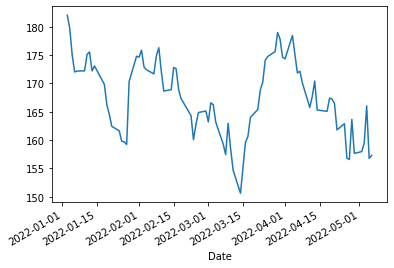

In [42]:
aapl_df = fdr.DataReader('AAPL', '2022') # 005930(삼성전자)
df.head()
aapl_df['Close'].plot()